In [1]:
from sys import path

path.append("../")

from src.utils.statistical_analysis import (
    load_and_prepare_data,
    compute_statistics,
    make_plot,
)

In [2]:
from numpy import sqrt, ndarray, asarray
from scipy import stats
from pandas import DataFrame
from statsmodels.stats.multitest import multipletests

def custom_t_test_correlation(correlation_values: ndarray, n: int, alpha: int = 0.05):
    """
    Perform a t-test on the correlation values.

    Args:
        correlation_values (DataFrame): The correlation values.
        n (int): The number of samples.

    Returns:
        float: The t-statistic.
        float: The p-value.
    """

    initial_shape = correlation_values.shape
    correlation_values = correlation_values.reshape(-1)
    t: ndarray = (correlation_values * (n-2)**0.5)/(sqrt(1-correlation_values**2))
    # get pvalues from t
    pval = stats.t.sf(abs(t), n-2) * 2
    multi_hypothesis_result = multipletests(
    pval,
    alpha=0.05,
    method="holm",
)   
    pvals_corrected = multi_hypothesis_result[1]
    below_threshold = pvals_corrected < alpha

    return t.reshape(initial_shape), pvals_corrected.reshape(initial_shape), below_threshold.reshape(initial_shape)

# MWC2022

In [3]:
n_tot = 4873

In [4]:
from json import load
path_to_data = "../data.nosync/usilaughs/results/correlation_rl_features_bilateral.json"
# values_w_intervals, feature_names = load_and_prepare_data(path_to_data)

with open(path_to_data, "r") as f:
        cliff_delta_results = load(f)

In [5]:
cliff_delta_results

{'positive-left/right': {'mixed-EDA': {'min_feat': [0.6887880890468181,
    6.002028871359753e-52,
    [0.6303000992733387, 0.7395015480790957]],
   'max_feat': [0.7479771888282276,
    1.050743532190634e-65,
    [0.6986278849944791, 0.7902434815430527]],
   'mean_feat': [0.7173180651131793,
    3.876918992395442e-58,
    [0.6631223217611154, 0.7640320295088914]],
   'std_feat': [0.3690186892346095,
    4.683114001632349e-13,
    [0.27619148547819194, 0.4550247550066897]],
   'dynamic_range_feat': [0.3530645264694383,
    5.2344560157814885e-12,
    [0.25916034466502647, 0.44035625476079154]],
   'slope_feat': [0.22644302807894942,
    1.4379179074321837e-05,
    [0.12603103344551886, 0.3222621233834263]],
   'absolute_slope_feat': [0.37971854043199427,
    8.594880784851293e-14,
    [0.28764637856619024, 0.4648362820534553]],
   'first_derivetive_mean_feat': [0.2371403369649725,
    5.394711188402185e-06,
    [0.13713998846035347, 0.33235570286290006]],
   'first_derivative_std_feat':

In [6]:
cliff_delta_results_main_val = {
    combination: {
        component: {
            feature: feature_data[0]
            for feature, feature_data in component_data.items()
        }
        for component, component_data in combination_data.items()
    }
    for combination, combination_data in cliff_delta_results.items()
}

In [7]:
from numpy import nanmean
cliff_delta_results_main_val = {
    combination: {
        component: nanmean(asarray(list(component_data.values())))
        for component, component_data in combination_data.items()
    }
    for combination, combination_data in cliff_delta_results_main_val.items()
}

In [8]:
cliff_delta_results_main_val

{'positive-left/right': {'mixed-EDA': 0.3978588565233209,
  'phasic-EDA': 0.30325014282789425,
  'tonic-EDA': 0.3968021817696934},
 'positive-left/diff': {'mixed-EDA': 0.09323642440846965,
  'phasic-EDA': 0.07516372892950544,
  'tonic-EDA': 0.1323641043307116},
 'positive-right/diff': {'mixed-EDA': 0.19360599733540151,
  'phasic-EDA': 0.1460682858975906,
  'tonic-EDA': 0.5101579394853393},
 'negative-left/right': {'mixed-EDA': 0.45084493687989957,
  'phasic-EDA': 0.3990094163525126,
  'tonic-EDA': 0.4863944060296987},
 'negative-left/diff': {'mixed-EDA': 0.09352066959828237,
  'phasic-EDA': 0.015391721443768174,
  'tonic-EDA': 0.18450003949181568},
 'negative-right/diff': {'mixed-EDA': 0.4274322994296645,
  'phasic-EDA': 0.42690565741629044,
  'tonic-EDA': 0.5614333872514696}}

In [9]:
cliff_delta_results_main_val_new = {}
for combination, combination_data in cliff_delta_results_main_val.items():
    if combination.split("-")[0] not in cliff_delta_results_main_val_new.keys():
        cliff_delta_results_main_val_new[combination.split("-")[0]] = {combination.split("-")[1]: combination_data}
    else:
        cliff_delta_results_main_val_new[combination.split("-")[0]].update({combination.split("-")[1]: combination_data})    
    

Phasic and tonic are inverted, for some reason

In [10]:
positive_correlations

NameError: name 'positive_correlations' is not defined

In [11]:
# import round function
from numpy import round
positive_correlations = cliff_delta_results_main_val_new['positive']
negative_correlations = cliff_delta_results_main_val_new['negative']

final_dict = {
    combination: {
            component: (round(positive_correlations[combination][component], 2), round(negative_correlations[combination][component], 2))
        for component in positive_correlations[combination].keys()
        for side in positive_correlations[combination].keys()
    }
    for combination in positive_correlations.keys()   
}

In [12]:
final_dict = DataFrame.from_dict(final_dict)

In [13]:
# approximate to the 2nd decimal and save final_dict to latex table
final_dict.T.to_latex("../test.tex")

/var/folders/rc/t3h_b88s3vbg5dcd4pnlgskr0000gp/T/ipykernel_21030/1513900654.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  final_dict.T.to_latex("../test.tex")


In [5]:
from pandas import DataFrame


t_vals, p_vals, below_thresholds = custom_t_test_correlation(
    values_w_intervals.iloc[:, :2].values, n_tot
)
below_thresholds = DataFrame(
    below_thresholds, index=values_w_intervals.index
)
from pandas import concat, MultiIndex
below_thresholds.columns = MultiIndex.from_product([["negative", "positive"], ['below_threshold']])
values_w_intervals = concat([values_w_intervals, below_thresholds], axis=1)

In [6]:
pvalues = compute_statistics(
    values_w_intervals=values_w_intervals, events=["Cognitive Load", "Relaxation"]
)

Average cliff δ for Cognitive Load: 0.47
Average cliff δ for Relaxation: 0.44
Percentage of intervals where Cognitive Load has larger cliff δ values: 44.44%
Percentage of intervals where Relaxation has larger cliff δ values: 15.56%
Percentage of intervals where there is no difference: 40.00%


/Users/leonardoalchieri/Desktop/GIT/LateralizationPhysiologicalWearables/plotting_notebooks/../src/utils/statistical_analysis.py:222: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


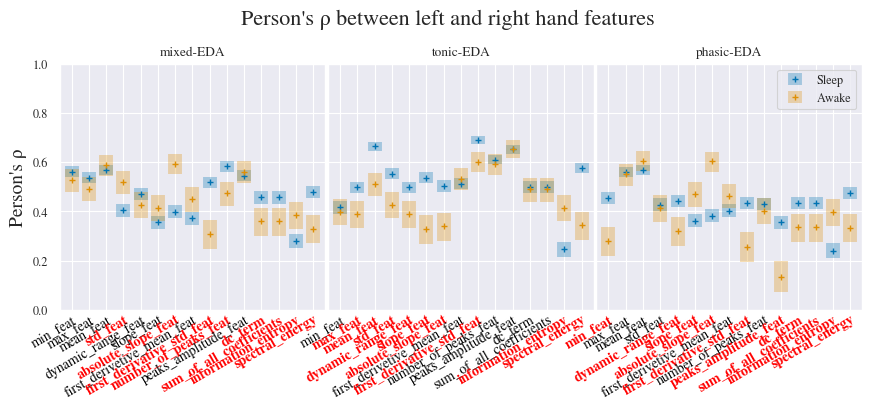

In [7]:

make_plot(
    values_w_intervals,
    "../final_visualizations/correlation_rl_complete-mwc2022.pdf",
    feature_names,
    classes_list=["Sleep", "Awake"],
    measure_name="Person's ρ",
    plot_title="Person's ρ between left and right hand features",
    ylim=[0, 1],
    make_thresholds=False,
    marker='below_threshold',
)


# USILaughs

In [8]:
n_tot = 810

In [9]:
path_to_data = "../data.nosync/usilaughs/results/correlation_rl_features_complete-3.json"
values_w_intervals, feature_names = load_and_prepare_data(path_to_data)

In [10]:
from pandas import DataFrame


t_vals, p_vals, below_thresholds = custom_t_test_correlation(
    values_w_intervals.iloc[:, :2].values, n_tot
)
below_thresholds = DataFrame(
    below_thresholds, index=values_w_intervals.index
)
from pandas import concat, MultiIndex
below_thresholds.columns = MultiIndex.from_product([["negative", "positive"], ['below_threshold']])
values_w_intervals = concat([values_w_intervals, below_thresholds], axis=1)

In [11]:
pvalues = compute_statistics(values_w_intervals=values_w_intervals, events=['Cognitive Load', 'Relaxation'])

Average cliff δ for Cognitive Load: 0.37
Average cliff δ for Relaxation: 0.46
Percentage of intervals where Cognitive Load has larger cliff δ values: 0.00%
Percentage of intervals where Relaxation has larger cliff δ values: 22.73%
Percentage of intervals where there is no difference: 77.27%


In [12]:
from pandas import concat, MultiIndex

# concate the pvalues results
pvalues.columns = MultiIndex.from_product([pvalues.columns, ['']])
values_w_intervals = concat([values_w_intervals, pvalues], axis=1)

/Users/leonardoalchieri/Desktop/GIT/LateralizationPhysiologicalWearables/plotting_notebooks/../src/utils/statistical_analysis.py:222: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


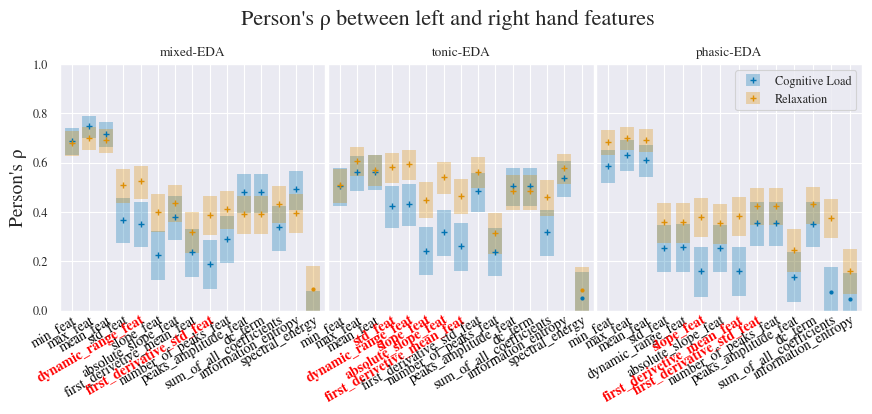

In [13]:
make_plot(
    values_w_intervals,
    "../final_visualizations/correlation_rl_complete-usilaughs.pdf",
    feature_names,
    classes_list=["Cognitive Load", "Relaxation"],
    measure_name="Person's ρ",
    plot_title="Person's ρ between left and right hand features",
    ylim=[0, 1],
    make_thresholds=False,
    marker='below_threshold',
    # marker='above_threshold',
)